**Kmeans clustering**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


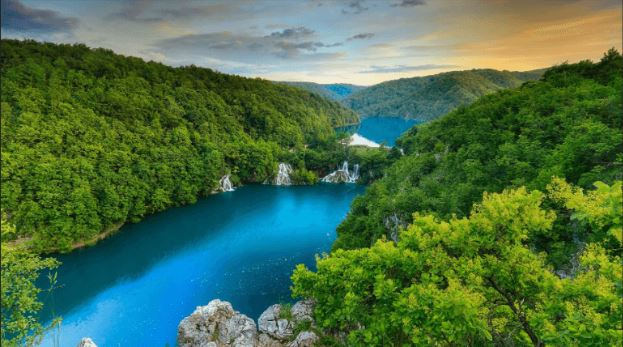

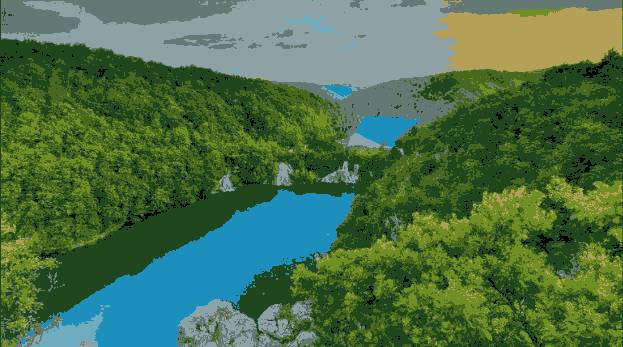

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def clust_rgb(image,k,iters): 
    img=image.copy()
    h,w,c=img.shape
    orig=image.copy()
    Klusters=np.random.randint(0,255,size=(k,3))
    # print('init clusters', Klusters)
    for it in range(iters):
        img=image.copy()
        for i in range(h):
            for j in range(w):

                pnt=img[i][j] #tọa độ điểm đang xét

                diff=np.sqrt(np.sum((Klusters-pnt)**2,axis=1)) # tính khoảng cách đến tâm các cụm

                c=np.argmin(diff) # tìm khoang cach gan nhat
                img[i][j]=Klusters[c] 
        # loss=0
        #duyệt lại tâm cụm
        l=[]
        for i in range(k):
            Ys,Xs,c=np.where(img==Klusters[i]) #dua vao cum gan nhat
            kth_points=orig[Ys,Xs] 
            l.append(np.sum(Klusters[i]-kth_points)) # tính tổng pt trong cụm
            Klusters[i]=np.mean(kth_points,axis=0) #tính lại tâm cụm
            # loss=sum(l)
        # print('Cluster centroids at iteration-{}'.format(it+1), Klusters)
    return img



if __name__ == '__main__':
	image=cv2.imread('Kmean.jpg')
	clusters=clust_rgb(image,10, 5)
	cv2_imshow(image)
	cv2_imshow(clusters)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

Mean_Shift

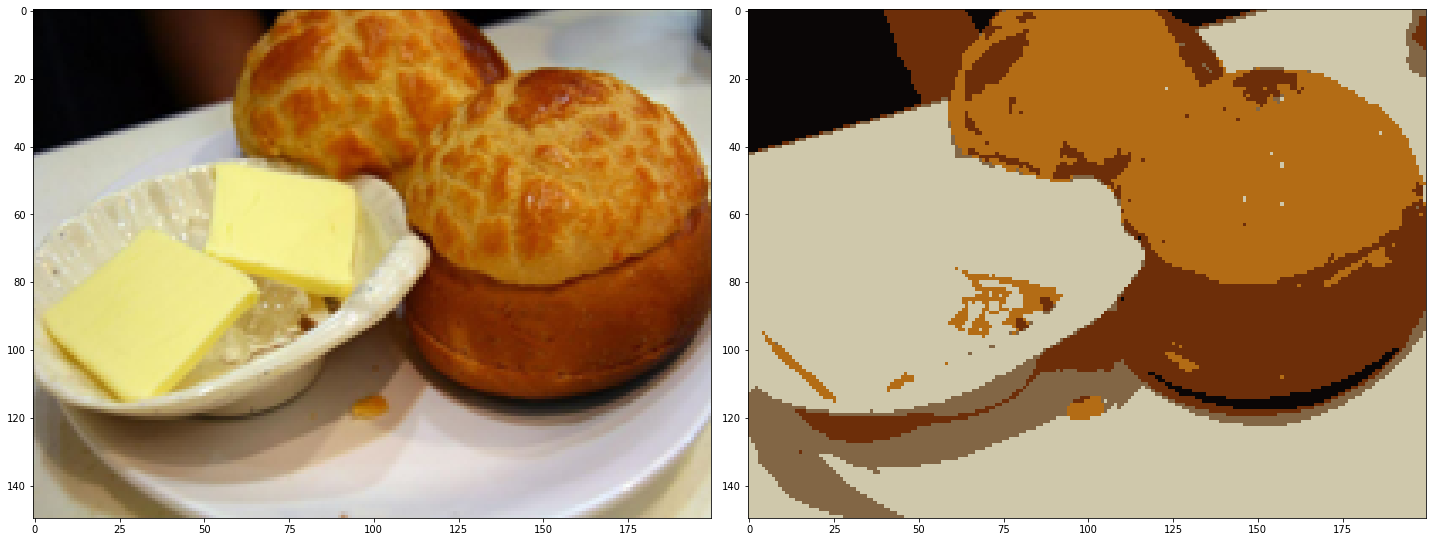

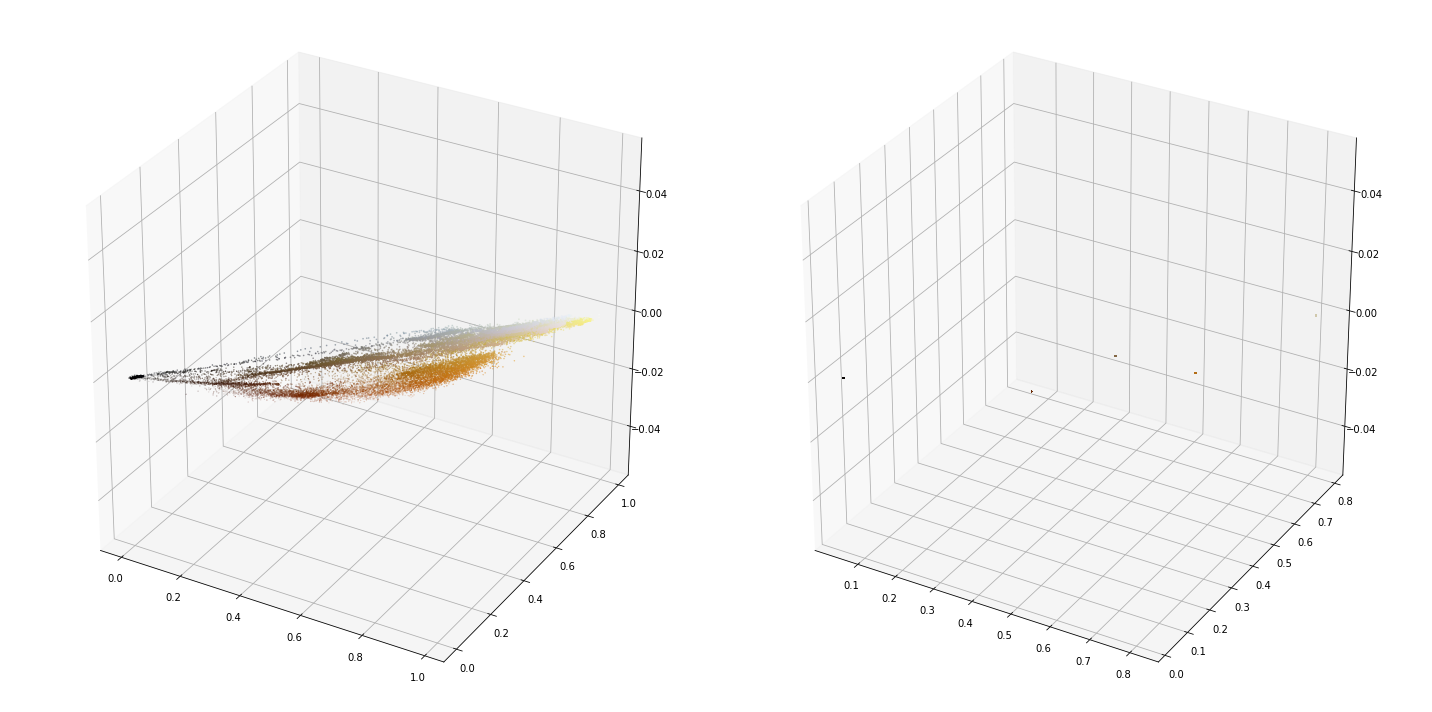

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image


def mean_shift(img, h=10, n=5):
    H, W = img.shape[:2]
    img1 = img.copy()
    img2 = img.copy()
    for i in range(n):
        for y in range(H):
            for x in range(W):
                #the kernel density estimate ước tính mức độ hạt nhân
                k = np.square((img1[y, x]-img1)/h).sum(-1)
                k = np.exp(-k)
                #vector dich chuyen
                a = ((img1-img1[y, x]) * np.expand_dims(k, -1)).sum((0, 1))
                grad = a/k.sum()
                img2[y, x] += grad
            print('Progress: {:.02f}{}'.format(
                100*(i*H+y+1)/n/H, '%'), end='\r')
        img1 = img2
    return img1


if __name__ == "__main__":
    img = Image.open('bread.jpg').resize((200, 150))
    img = np.array(img)/255
    img_s = mean_shift(img, h=0.1, n=15)

    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(img_s)
    plt.tight_layout()
    plt.savefig('a.jpg')
    plt.show()

    colors = img.reshape(-1, 3)
    plt.figure(figsize=(20, 10))
    plt.subplot(121, projection='3d')
    plt.scatter(colors[:, 0], colors[:, 1], colors[:, 2], c=colors)

    colors = img_s.reshape(-1, 3)
    plt.subplot(122, projection='3d')
    plt.scatter(colors[:, 0], colors[:, 1], colors[:, 2], c=colors)
    plt.tight_layout()
    plt.show()